In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
buildingo = pd.read_csv('Building_Ownership_Use.csv')
buildingc = pd.read_csv('Building_Structure.csv')
test = pd.read_csv('test.csv')

In [3]:
train.groupby("damage_grade")['damage_grade'].value_counts()

damage_grade  damage_grade
Grade 1       Grade 1          61320
Grade 2       Grade 2          85084
Grade 3       Grade 3         122288
Grade 4       Grade 4         152244
Grade 5       Grade 5         210825
Name: damage_grade, dtype: int64

In [4]:
combin = pd.concat([train, test])

/home/tinku/.virtualenvs/cv/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [5]:
combin = pd.merge(left = combin, right = buildingo, on = ['building_id','vdcmun_id', 'district_id'] )

In [6]:
combin = pd.merge(left = combin, right = buildingc, on = ['building_id','vdcmun_id', 'district_id', 'ward_id'] )

In [7]:
del( buildingo, buildingc)

In [8]:
combin_na = (combin.isnull().sum()/len(combin))
combin_na = combin_na.drop(combin_na[combin_na==0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing': combin_na})
missing_data

,Missing
damage_grade,4.000006e-01
has_repair_started,5.255685e-02
count_families,9.497253e-07


In [9]:
combin.groupby('has_repair_started')['has_repair_started'].value_counts()

has_repair_started  has_repair_started
0.0                 0.0                   682263
1.0                 1.0                   315334
Name: has_repair_started, dtype: int64

In [10]:
combin.groupby('count_families')['count_families'].value_counts()

count_families  count_families
0.0             0.0                84304
1.0             1.0               913095
2.0             2.0                46244
3.0             3.0                 7075
4.0             4.0                 1618
5.0             5.0                  413
6.0             6.0                  128
7.0             7.0                   33
8.0             8.0                   16
9.0             9.0                    8
11.0            11.0                   1
Name: count_families, dtype: int64

In [11]:
combin.count_families.fillna(1, inplace = True)
combin.has_repair_started.fillna(0, inplace = True)

In [12]:
combin.dtypes

area_assesed                               object
building_id                                object
damage_grade                               object
district_id                                 int64
has_geotechnical_risk                     float64
has_geotechnical_risk_fault_crack           int64
has_geotechnical_risk_flood                 int64
has_geotechnical_risk_land_settlement       int64
has_geotechnical_risk_landslide             int64
has_geotechnical_risk_liquefaction          int64
has_geotechnical_risk_other                 int64
has_geotechnical_risk_rock_fall             int64
has_repair_started                        float64
vdcmun_id                                   int64
ward_id                                     int64
legal_ownership_status                     object
count_families                            float64
has_secondary_use                         float64
has_secondary_use_agriculture               int64
has_secondary_use_hotel                     int64


In [13]:
combin.area_assesed.unique()
pd.crosstab(train['damage_grade'], train['area_assesed']).apply(lambda x: (x/x.sum())*100, axis = 0)
#combin.groupby('area_assesed')['area_assesed'].value_counts()
combin['area_assesed_count'] = combin.groupby('area_assesed')['area_assesed'].transform('count')

In [14]:
combin.drop('building_id', axis = 1, inplace = True)

In [15]:
combin['district_id_count'] = combin.groupby('district_id')['district_id'].transform('count')

In [16]:
combin['vdcmun_id_count'] = combin.groupby('vdcmun_id')['vdcmun_id'].transform('count')

In [17]:
combin['ward_id_count'] = combin.groupby('ward_id')['ward_id'].transform('count')

In [18]:
combin.head()

,area_assesed,damage_grade,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,...,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,area_assesed_count,district_id_count,vdcmun_id_count,ward_id_count
0,Both,Grade 4,24,0.0,0,0,0,0,0,0,...,0,0,0,0,0,Damaged-Not used,638160,98019,1265,75
1,Both,Grade 2,44,0.0,0,0,0,0,0,0,...,0,0,0,0,0,Damaged-Repaired and used,638160,10940,376,21
2,Both,Grade 1,36,0.0,0,0,0,0,0,0,...,0,0,0,1,0,Not damaged,638160,78074,7901,974
3,Building removed,Grade 5,30,0.0,0,0,0,0,0,0,...,0,0,0,0,0,Damaged-Rubble clear,218946,89122,2409,347
4,Both,Grade 3,36,0.0,0,0,0,0,0,0,...,0,0,0,0,0,Damaged-Used in risk,638160,78074,1589,471


In [19]:
combin = combin.drop(['district_id'], axis = 1)

In [20]:
combin = combin.drop(['vdcmun_id'], axis = 1)

In [21]:
combin = combin.drop(['ward_id'], axis = 1)

In [22]:
train2 = combin[combin.damage_grade.isnull() == False]
test2 = combin[combin.damage_grade.isnull() == True]
del(combin)

In [23]:
test2 = test2.drop(['damage_grade'], axis = 1)

In [24]:
X = train2.drop(['damage_grade'], axis = 1)
X = pd.get_dummies(X, drop_first=True)
test2 = pd.get_dummies(test2, drop_first=True)
y = train2['damage_grade']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)

In [47]:
import lightgbm as lgb
dtrainlgb = lgb.Dataset(data = X_train, label = y_train)
params = {'objective': 'softmax',
         'learning_rate' : 0.1,
          'num_class' : 5}
cv_results = lgb.cv(params,
                    dtrainlgb,
                    num_boost_round = 100,
                    nfold = 3,
                    metrics = 'multi_error',
                    early_stopping_rounds = 10,
                    verbose_eval = True)

[1]	cv_agg's multi_error: 0.290126 + 0.000896825
[2]	cv_agg's multi_error: 0.289312 + 0.00154345
[3]	cv_agg's multi_error: 0.288631 + 0.00178121
[4]	cv_agg's multi_error: 0.288193 + 0.00177275
[5]	cv_agg's multi_error: 0.287781 + 0.0016016
[6]	cv_agg's multi_error: 0.287347 + 0.00176024
[7]	cv_agg's multi_error: 0.287037 + 0.00165143
[8]	cv_agg's multi_error: 0.286589 + 0.00127749
[9]	cv_agg's multi_error: 0.285839 + 0.00171585
[10]	cv_agg's multi_error: 0.285253 + 0.0018361
[11]	cv_agg's multi_error: 0.28433 + 0.0020639
[12]	cv_agg's multi_error: 0.284066 + 0.00179815
[13]	cv_agg's multi_error: 0.283573 + 0.00180538
[14]	cv_agg's multi_error: 0.283568 + 0.00191295
[15]	cv_agg's multi_error: 0.283354 + 0.00173059
[16]	cv_agg's multi_error: 0.283008 + 0.00159156
[17]	cv_agg's multi_error: 0.282723 + 0.00176429
[18]	cv_agg's multi_error: 0.282422 + 0.00143401
[19]	cv_agg's multi_error: 0.282241 + 0.00143663
[20]	cv_agg's multi_error: 0.28189 + 0.00133141
[21]	cv_agg's multi_error: 0.2815

In [48]:
lgb_model = lgb.train(params,
                     dtrainlgb,
                     num_boost_round = 100,
                     verbose_eval = True)

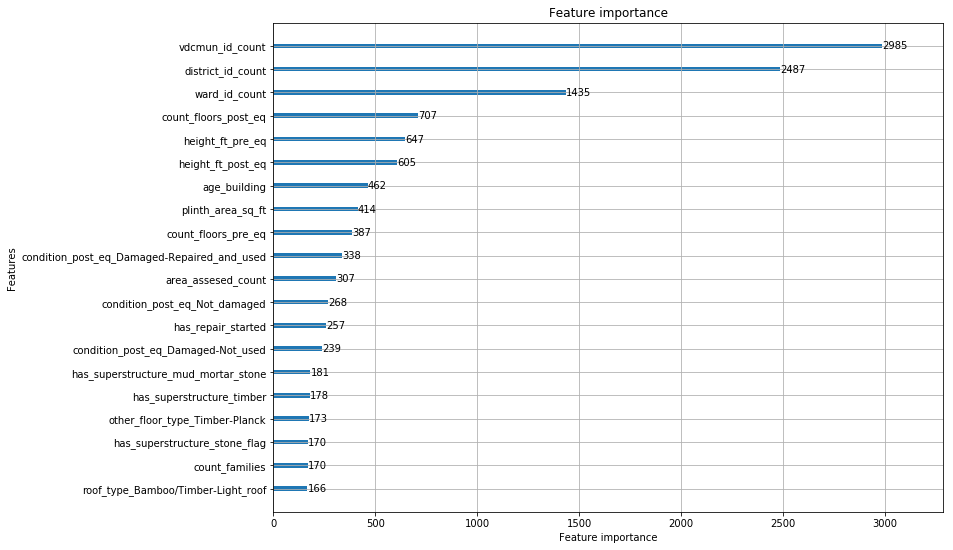

In [103]:
import matplotlib.pyplot as plt
a = lgb.plot_importance(lgb_model, max_num_features=20, height=.2, figsize=(12,9))


In [49]:
lgb_pred = lgb_model.predict(X_test)

In [75]:
dataf = pd.DataFrame(lgb_pred)

In [76]:
dataf.head()

,0,1,2,3,4
0,0.000016,0.000060,0.000031,0.000066,0.999827
1,0.043832,0.232614,0.326820,0.391057,0.005678
2,0.055013,0.387176,0.434403,0.117604,0.005803
3,0.000016,0.000041,0.000031,0.000060,0.999852
4,0.999381,0.000345,0.000057,0.000144,0.000074


In [77]:
dataf['max_col'] = dataf.idxmax(axis=1)

In [80]:
dataf.head()

,0,1,2,3,4,max_col,class
0,0.000016,0.000060,0.000031,0.000066,0.999827,4,Grade 5
1,0.043832,0.232614,0.326820,0.391057,0.005678,3,Grade 4
2,0.055013,0.387176,0.434403,0.117604,0.005803,2,Grade 3
3,0.000016,0.000041,0.000031,0.000060,0.999852,4,Grade 5
4,0.999381,0.000345,0.000057,0.000144,0.000074,0,Grade 1


In [79]:
dataf['class'] = 'Grade 1'
dataf.loc[dataf['max_col'] == 1, 'class'] = 'Grade 2'
dataf.loc[dataf['max_col'] == 2, 'class'] = 'Grade 3'
dataf.loc[dataf['max_col'] == 3, 'class'] = 'Grade 4'
dataf.loc[dataf['max_col'] == 4, 'class'] = 'Grade 5'

In [85]:
from sklearn.metrics import f1_score
accu = f1_score(y_test, dataf['class'], average='weighted')

In [86]:
accu

0.7393117080785385

In [52]:
# from xgboost import XGBClassifier
# from sklearn.metrics import f1_score
# from sklearn.model_selection import cross_val_score
# model = XGBClassifier(max_depth=6, silent= False, n_estimators=50)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# acc = f1_score(y_test, y_pred, average='weighted')
# print(acc)
# submit = model.predict(test2)
# output = pd.DataFrame({'building_id': test.building_id, 'damage_grade' : submit})
# output.to_csv('output.csv', index=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1)